In [4]:
import sys
import uproot
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [8]:
# reading-in data 
# Tree = uproot.concatenate("DlDl_*ed-1-199.root:Y4S",library="pd")

In [16]:
# pickling commands
pickle_dir = "./dataTree.pickle"

# serialization - saving data
# with open(pickle_dir, 'wb') as handle:
        # pickle.dump(Tree, handle, protocol=pickle.HIGHEST_PROTOCOL)

# deserialization - loading data
with open(pickle_dir, 'rb') as handle:
    aTree = pickle.load(handle)

Invariant mass $\Delta m$ for $D^*$ modes which decay into a charged $\pi^+$ or neutral $\pi^0$

$\Delta m = m(D \pi) - m(D)$

$D^{*+} \rightarrow D^0 \pi^+$\
$D^{*+} \rightarrow D^+ \pi^0$\
$D^{*0} \rightarrow D^0 \pi^0$\
$D^{*0} \rightarrow D^0 \gamma$

In [9]:
def fill_li(li):
    return li+[i+1 for i in li]

# D* decay modes
Dsp = fill_li([100,500,1000,1400])
Ds0 = fill_li([300,700,1200,1600])

In [18]:
def get_dM(ID1,ID2):
    # paramater ID1 is a list, ID2 is an int
    # Tree0 = aTree.query(f"B0_decayModeID == {ID1} & D_B0_decayModeID == {ID2}")
    # Tree1 = aTree.query(f"B1_decayModeID == {ID1} & D_B1_decayModeID == {ID2}")
    Tree0 = aTree[(aTree.B0_decayModeID.isin(ID1)) & (aTree.D_B0_decayModeID == ID2)]
    Tree1 = aTree[(aTree.B1_decayModeID.isin(ID1)) & (aTree.D_B1_decayModeID == ID2)]
    dM0 = Tree0.D_B0_InvM - Tree0.D_0_B0_InvM
    dM1 = Tree1.D_B1_InvM - Tree1.D_0_B1_InvM
    return pd.concat([dM0,dM1])

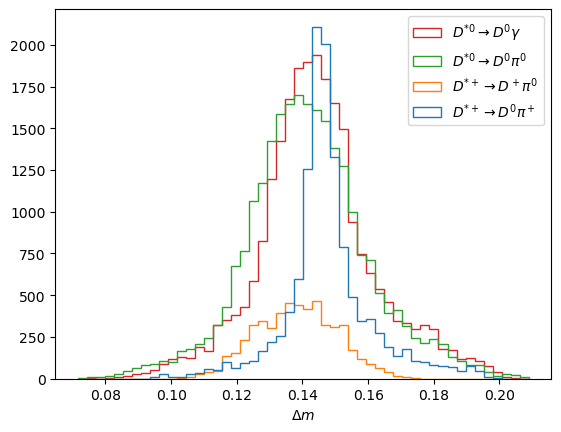

In [19]:
dM1 = get_dM(Dsp,-10)
dM2 = get_dM(Dsp,-1)
dM3 = get_dM(Ds0,-2)
dM4 = get_dM(Ds0,0)
dM = [dM1,dM2,dM3,dM4]

labels = ["$D^{*+} \\rightarrow D^0 \\pi^+$",
          "$D^{*+} \\rightarrow D^+ \\pi^0$",
          "$D^{*0} \\rightarrow D^0 \\pi^0$",
          "$D^{*0} \\rightarrow D^0 \\gamma$"]

plt.hist(dM,histtype="step",bins=50,label=labels)
plt.xlabel("$\\Delta m$")
plt.legend()
plt.show()

In [63]:
# aTree.loc['mixed']

In [6]:
# pickling commands
pickle_dir = "./semileptonic_Bdecay_data_1.pkl"

# serialization - saving data
# with open(pickle_dir, 'wb') as handle:
        # pickle.dump(Tree, handle, protocol=pickle.HIGHEST_PROTOCOL)

# deserialization - loading data
with open(pickle_dir, 'rb') as handle:
    aTree = pickle.load(handle)

Invariant mass of $D^{(*)} \pi$

make seperate plots for decays with charged and neutral pion

$B^- \rightarrow D^{(*)+}\ \pi^-\ \ell^-\ \bar \nu$\
$B^0 \rightarrow D^{(*)0}\ \pi^+\ \ell^-\ \bar \nu$

$B^0 \rightarrow D^{(*)+}\ \pi^0\ \ell^-\ \bar \nu$\
$B^- \rightarrow D^{(*)0}\ \pi^0\ \ell^-\ \bar \nu$

when $B_0$ includes a pion, $B_1$ should not. Thus,

$B_0 \rightarrow D^{(*)}\ \pi\ \ell\ \bar \nu$\
$B_1 \rightarrow D^{(*)}\ \ell\ \bar \nu$

In [10]:
def get_Inv_M(ID):
    
    # cut selects events in the list of given modes
    # Tree = aTree.query(f'((B0_decayModeID=={ID} & B1_decayModeID < 500) | (B1_decayModeID=={ID} & B0_decayModeID<500)) & __candidate__ == 0')
    Tree = aTree[(((aTree.B0_decayModeID.isin(ID)) & (aTree.B1_decayModeID < 500)) |
                  ((aTree.B1_decayModeID.isin(ID)) & (aTree.B0_decayModeID < 500))) & (aTree.__candidate__ == 0)]
    
    # from sahar's notebook
    # calculating invariant mass of D pi by means of the 4-momentum vector
    mDB0 = np.array(Tree.D_B0_InvM)
    pDB0 = np.array(Tree.D_B0_pCM)
    phiDB0 = np.array(Tree.D_B0_phiCM)
    cthDB0 = np.array(Tree.D_B0_cosThCM)

    mpi4B0 = np.array(Tree.pi4_B0_InvM)
    ppi4B0 = np.array(Tree.pi4_B0_pCM)
    phipi4B0 = np.array(Tree.pi4_B0_phiCM)
    cthpi4B0 = np.array(Tree.pi4_B0_cosThCM)

    mDpi4B0 = np.sqrt(mDB0**2 + mpi4B0**2 + 
                      2*(np.sqrt(mDB0**2 + pDB0**2)*np.sqrt(mpi4B0**2 + ppi4B0**2) - 
                         pDB0*ppi4B0*(np.sqrt(1-cthDB0**2)*np.sqrt(1-cthpi4B0**2)*(np.cos(phiDB0)*np.cos(phipi4B0) + 
                                                                                   np.sin(phiDB0)*np.sin(phipi4B0)) + cthDB0*cthpi4B0)))

    mDB1 = np.array(Tree.D_B1_InvM)
    pDB1 = np.array(Tree.D_B1_pCM)
    phiDB1 = np.array(Tree.D_B1_phiCM)
    cthDB1 = np.array(Tree.D_B1_cosThCM)

    mpi4B1 = np.array(Tree.pi4_B1_InvM)
    ppi4B1 = np.array(Tree.pi4_B1_pCM)
    phipi4B1 = np.array(Tree.pi4_B1_phiCM)
    cthpi4B1 = np.array(Tree.pi4_B1_cosThCM)

    mDpi4B1 = np.sqrt(mDB1**2 + mpi4B1**2 + 
                      2*(np.sqrt(mDB1**2 + pDB1**2)*np.sqrt(mpi4B1**2 + ppi4B1**2) - 
                         pDB1*ppi4B1*(np.sqrt(1-cthDB1**2)*np.sqrt(1-cthpi4B1**2)*(np.cos(phiDB1)*np.cos(phipi4B1) +
                                                                                   np.sin(phiDB1)*np.sin(phipi4B1)) + cthDB1*cthpi4B1)))
    
    return np.concatenate([mDpi4B0, mDpi4B1])

In [11]:
# pion modes
charged = fill_li([500,600,700,800])
neutral = fill_li([1000,1100,1200,1300])

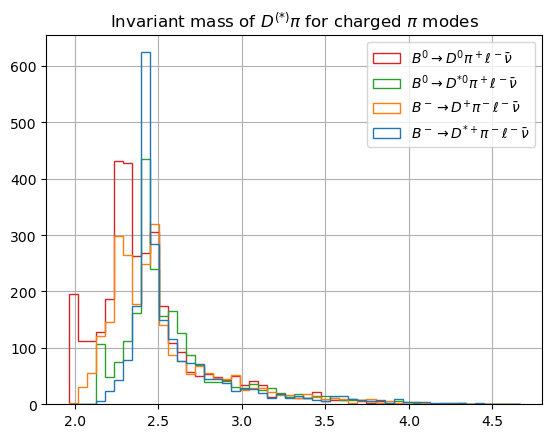

In [12]:
li = charged
invM = [get_Inv_M([id1,id2]) for id1,id2 in zip(li[:int(len(li)/2)],li[int(len(li)/2):])]

labels = ["$B^- \\rightarrow D^{*+} \\pi^- \\ell^- \\bar \\nu$",
          "$B^- \\rightarrow D^{+} \\pi^- \\ell^- \\bar \\nu$",
          "$B^0 \\rightarrow D^{*0} \\pi^+ \\ell^- \\bar \\nu$",
          "$B^0 \\rightarrow D^{0} \\pi^+ \\ell^- \\bar \\nu$"]

plt.hist(invM,histtype="step",bins=50,label=labels)
plt.title("Invariant mass of $D^{(*)} \pi$ for charged $\pi$ modes")
plt.legend()
plt.grid()
plt.show()

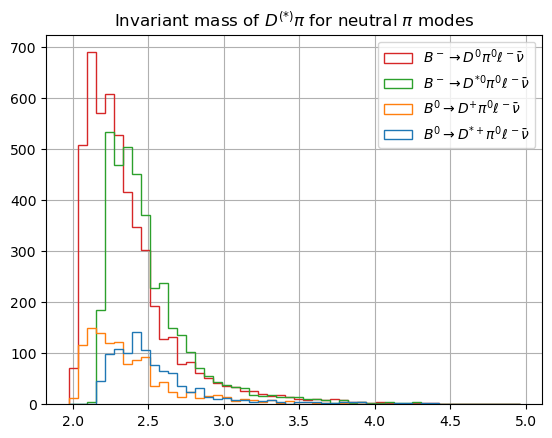

In [14]:
li = neutral
invM = [get_Inv_M([id1,id2]) for id1,id2 in zip(li[:int(len(li)/2)],li[int(len(li)/2):])]

labels = ["$B^0 \\rightarrow D^{*+} \\pi^0 \\ell^- \\bar \\nu$",
          "$B^0 \\rightarrow D^{+} \\pi^0 \\ell^- \\bar \\nu$",
          "$B^- \\rightarrow D^{*0} \\pi^0 \\ell^- \\bar \\nu$",
          "$B^- \\rightarrow D^{0} \\pi^0 \\ell^- \\bar \\nu$"]

plt.hist(invM,histtype="step",bins=50,label=labels)
plt.title("Invariant mass of $D^{(*)} \pi$ for neutral $\pi$ modes")
plt.legend()
plt.grid()
plt.show()

In [2]:
# [[id1,id2] for id1,id2 in zip(li[:int(len(li)/2)],li[int(len(li)/2):])]